## <p style = "text-align: center" >WEB SCRAPPING</p>
<hr>

We are performing Web Scraping on a data from kenyajob.com. Specifically we are collecting the available job opportunites in the category of IT, new technologies.

We will be using <span style = "color:red">BeautifulSoup</span>, a well known web scrapping library, for this task.

In [73]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [55]:
opportunities = []
recruiters = []

# We iterate over the 3 pages containing the IT job opportuniti
for n in range(0,3):
    
    # Constructing the URL for each page
    url = f"https://www.kenyajob.com/job-vacancies-search-kenya?f[0]=im_field_offre_metiers%3A31&utm_source=site&utm_medium=link&utm_campaign=search_split&utm_term=it&page={n}"
    
    result = requests.get(url)
    
    # Send a GET request to the URL
    src = result.content
    
    soup = BeautifulSoup(src)
    
    h5_element = soup.find_all('h5')
    
    job_titles = [h5.find('a').text for h5 in h5_element]
    
    opportunities.extend(job_titles)
    

    b_tags = soup.find_all('b')
    
     # Extract company names from the b tags
    company_name = [p.find('a').text for p in b_tags]
    
    # Extend the recruiters list with the extracted company names   
    recruiters.extend(company_name)

In [56]:
data = {
    'Position': opportunities,
    'Company' : recruiters
}

In [57]:
type(opportunities)

list

In [66]:
df = pd.DataFrame(data)

In [67]:
df.index = df.index +1

In [68]:
df

,Position,Company
1,Networking & Telephony Products Category Devel...,SHOPIT LIMITED
2,Ad-Hoc Data Analyst,CODINGO ASSIGNMENTS PTE. LTD.
3,IT and Digital Marketing Director (ENTRY LEVEL),INDIGO DISTRIBUTION LTD
4,Management Trainees,SAMEER AFRICA
5,Full Stack Software Engineering Intern (Volunt...,GLOBAL OPEN DATA FOR AGRICULTURE AND NUTRITION
...,...,...
69,GENESYS Architect (M/F),AFRICASHORE
70,Network Architect (M/F),AFRICASHORE
71,DBA IMS/DB2 Z/OS(M/F),AFRICASHORE
72,Z/OS System Engineer Senior Storage(M/F),AFRICASHORE


Text(0.5, 1.0, 'Number of Postions in Companies')

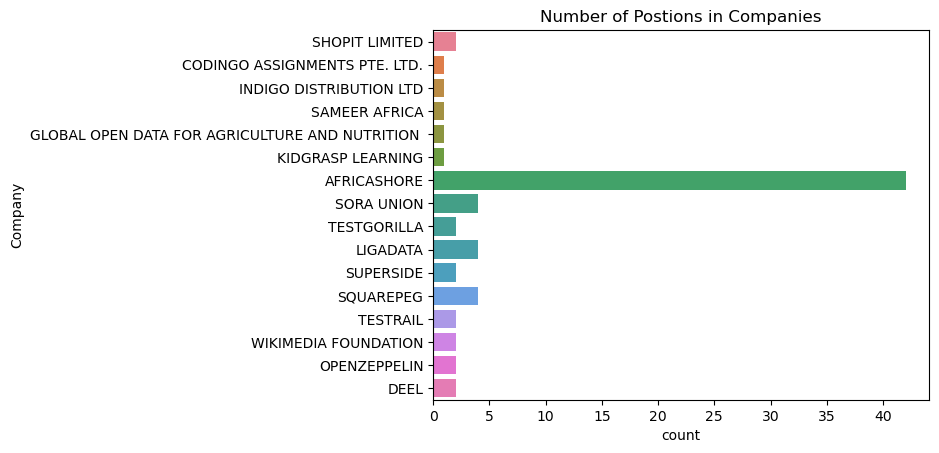

In [83]:
sns.countplot(df, y = df["Company"], hue = 'Company').set_title("Number of Postions in Companies")